## Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.cluster import DBSCAN, OPTICS
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [86]:
from matplotlib.animation import FuncAnimation

## Data

In [38]:
data = pd.read_csv("turkiye-student-evaluation_generic.csv")

In [40]:
# data = data.drop(columns=['FILENAME'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   instr       5820 non-null   int64
 1   class       5820 non-null   int64
 2   nb.repeat   5820 non-null   int64
 3   attendance  5820 non-null   int64
 4   difficulty  5820 non-null   int64
 5   Q1          5820 non-null   int64
 6   Q2          5820 non-null   int64
 7   Q3          5820 non-null   int64
 8   Q4          5820 non-null   int64
 9   Q5          5820 non-null   int64
 10  Q6          5820 non-null   int64
 11  Q7          5820 non-null   int64
 12  Q8          5820 non-null   int64
 13  Q9          5820 non-null   int64
 14  Q10         5820 non-null   int64
 15  Q11         5820 non-null   int64
 16  Q12         5820 non-null   int64
 17  Q13         5820 non-null   int64
 18  Q14         5820 non-null   int64
 19  Q15         5820 non-null   int64
 20  Q16         5820 non-null   in

In [46]:
data = data.dropna()

## Data Cleaning

In [42]:
# label_encoder = LabelEncoder()

In [9]:
# for column in data.select_dtypes(include=['object']).columns:
#     data[column] = label_encoder.fit_transform(data[column])

## EDA

In [43]:
print(data.describe())

             instr        class    nb.repeat   attendance   difficulty  \
count  5820.000000  5820.000000  5820.000000  5820.000000  5820.000000   
mean      2.485567     7.276289     1.214089     1.675601     2.783505   
std       0.718473     3.688175     0.532376     1.474975     1.348987   
min       1.000000     1.000000     1.000000     0.000000     1.000000   
25%       2.000000     4.000000     1.000000     0.000000     1.000000   
50%       3.000000     7.000000     1.000000     1.000000     3.000000   
75%       3.000000    10.000000     1.000000     3.000000     4.000000   
max       3.000000    13.000000     3.000000     4.000000     5.000000   

                Q1           Q2           Q3           Q4           Q5  ...  \
count  5820.000000  5820.000000  5820.000000  5820.000000  5820.000000  ...   
mean      2.929897     3.073883     3.178694     3.082474     3.105842  ...   
std       1.341077     1.285251     1.253567     1.284594     1.278989  ...   
min       1.00000

In [44]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   instr       5820 non-null   int64
 1   class       5820 non-null   int64
 2   nb.repeat   5820 non-null   int64
 3   attendance  5820 non-null   int64
 4   difficulty  5820 non-null   int64
 5   Q1          5820 non-null   int64
 6   Q2          5820 non-null   int64
 7   Q3          5820 non-null   int64
 8   Q4          5820 non-null   int64
 9   Q5          5820 non-null   int64
 10  Q6          5820 non-null   int64
 11  Q7          5820 non-null   int64
 12  Q8          5820 non-null   int64
 13  Q9          5820 non-null   int64
 14  Q10         5820 non-null   int64
 15  Q11         5820 non-null   int64
 16  Q12         5820 non-null   int64
 17  Q13         5820 non-null   int64
 18  Q14         5820 non-null   int64
 19  Q15         5820 non-null   int64
 20  Q16         5820 non-null   in

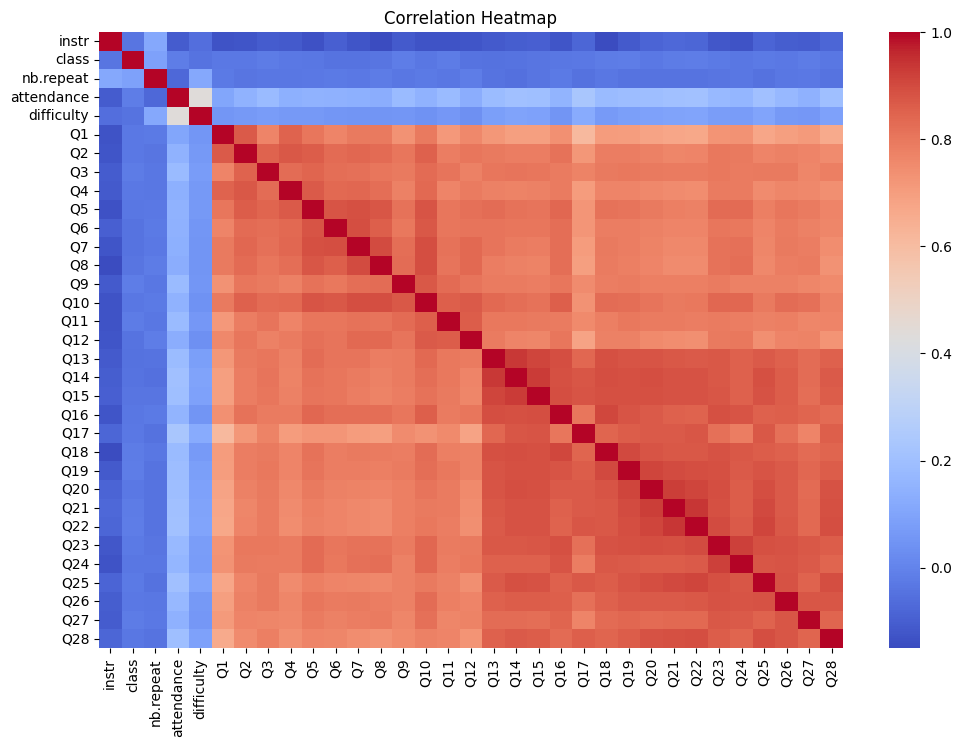

In [47]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

drop lowly corrlated values

In [48]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

In [49]:
# Get the correlations of all columns with the label column
correlations_with_label = correlation_matrix['label']

KeyError: 'label'

In [50]:
# Filter out columns with correlation between -0.2 and 0.2
columns_to_drop = correlations_with_label[(correlations_with_label > -0.2) & (correlations_with_label < 0.2)].index

In [52]:
columns_to_drop

Index(['IsDomainIP', 'TLD', 'TLDLegitimateProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'LargestLineLength', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'NoOfPopup', 'HasExternalFormSubmit',
       'HasPasswordField', 'Crypto', 'NoOfEmptyRef'],
      dtype='object')

In [ ]:
# Drop the low-correlation columns
data = data.drop(columns=columns_to_drop)

In [54]:
# Display the remaining columns
print("Remaining columns after dropping low-correlation columns:")
print(data.columns)

Remaining columns after dropping low-correlation columns:
Index(['instr', 'class', 'nb.repeat', 'attendance', 'difficulty', 'Q1', 'Q2',
       'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13',
       'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23',
       'Q24', 'Q25', 'Q26', 'Q27', 'Q28'],
      dtype='object')


In [18]:
# sns.pairplot(data, diag_kind='kde')
# plt.show()

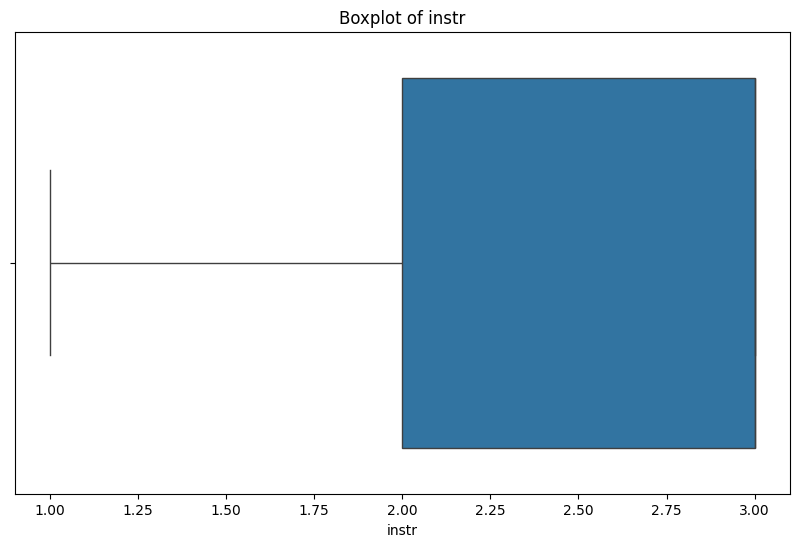

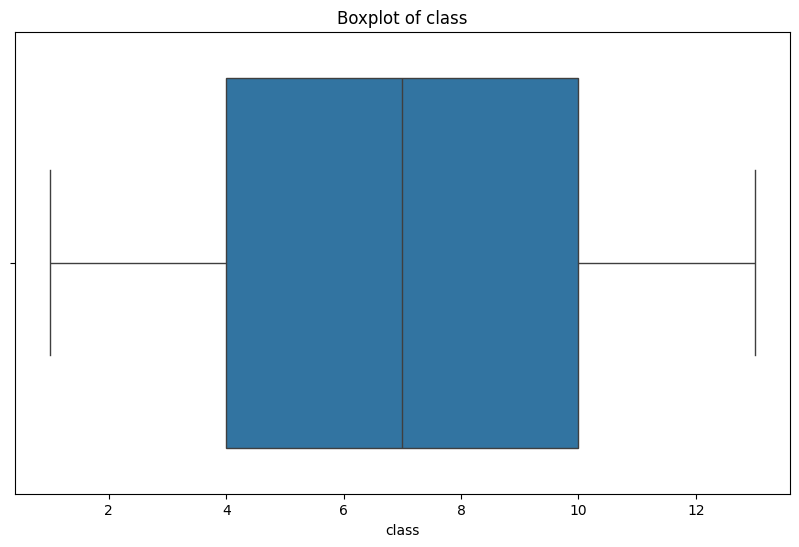

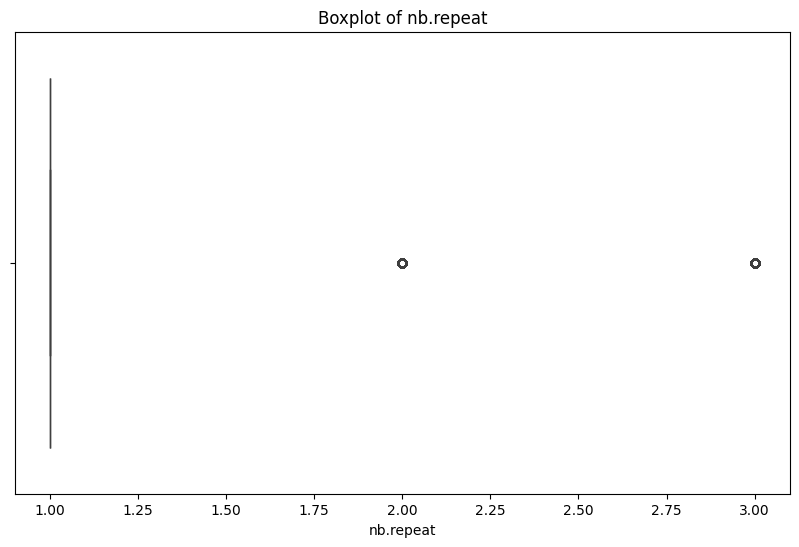

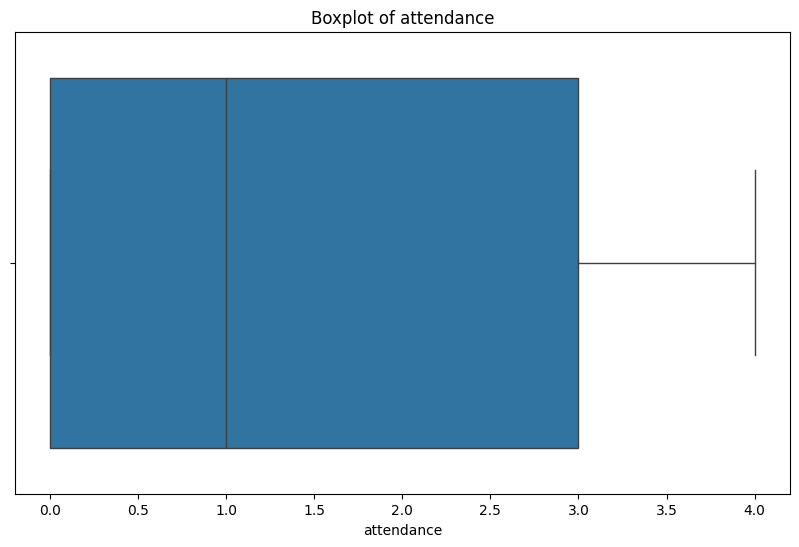

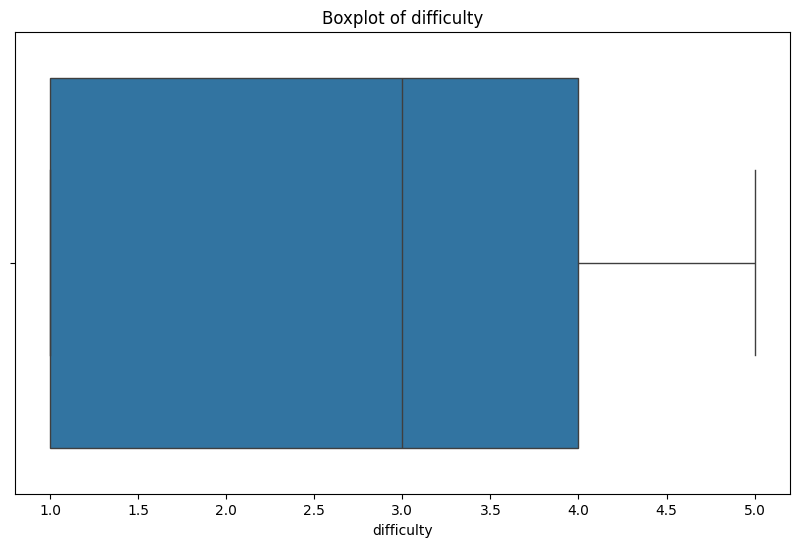

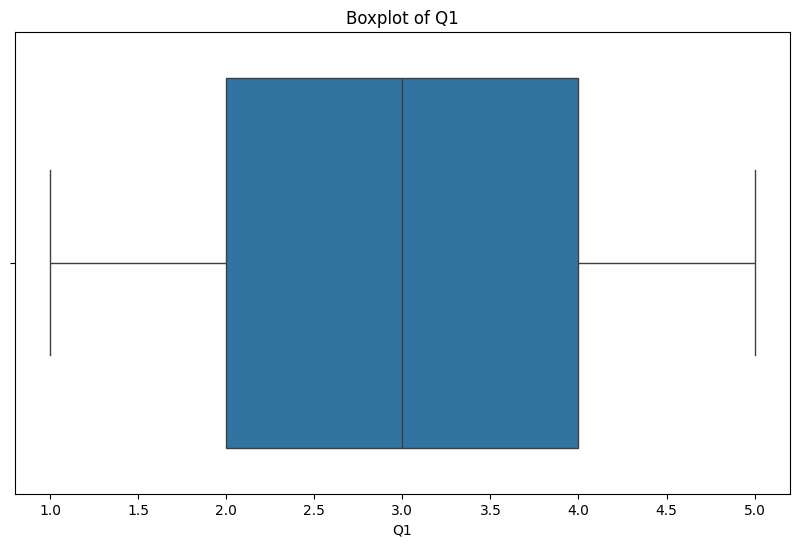

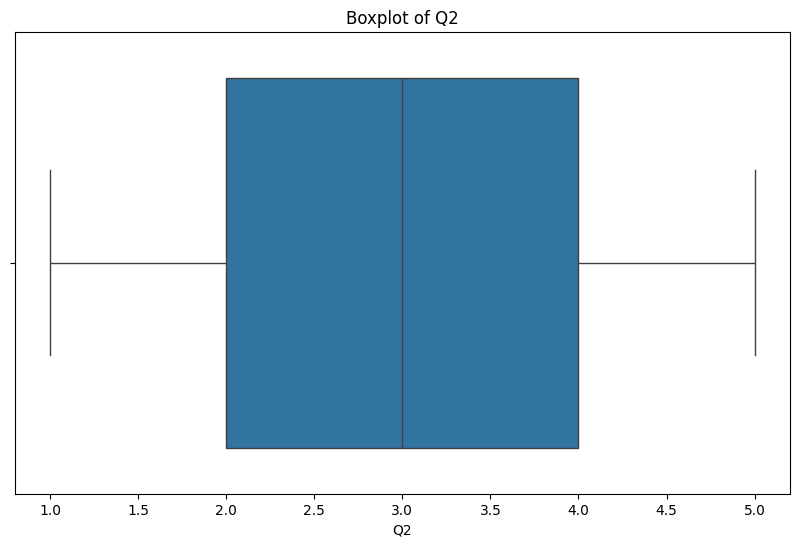

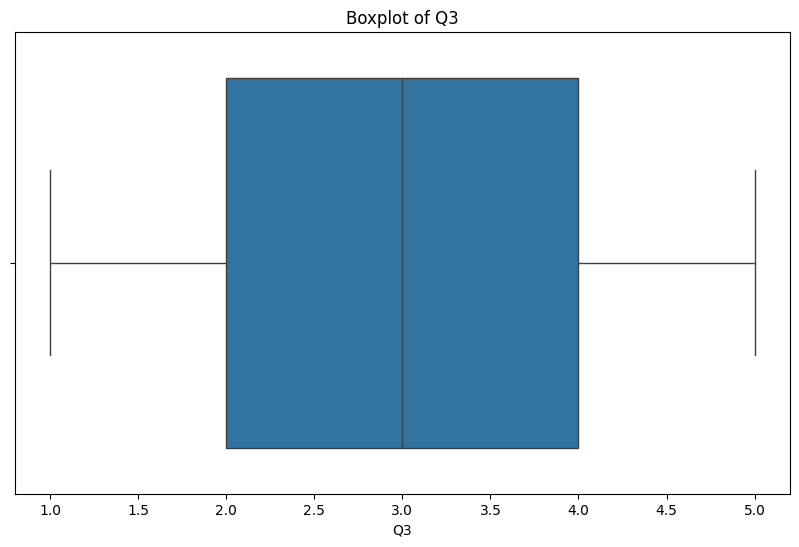

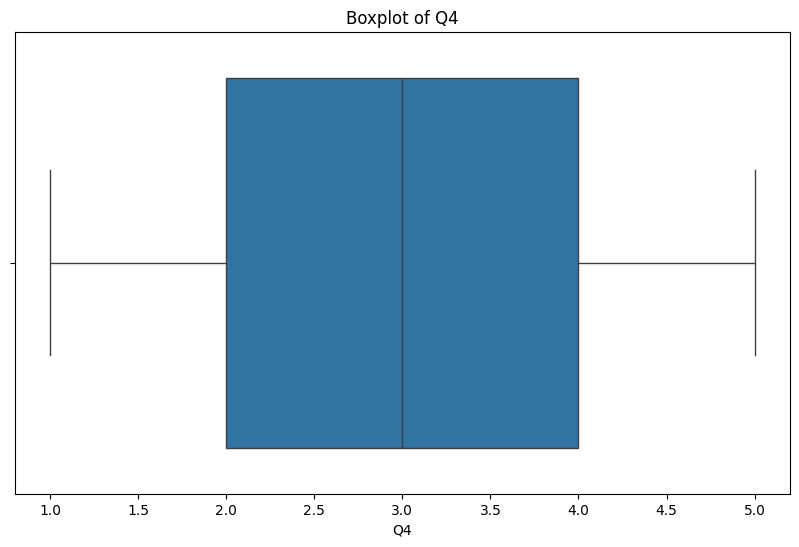

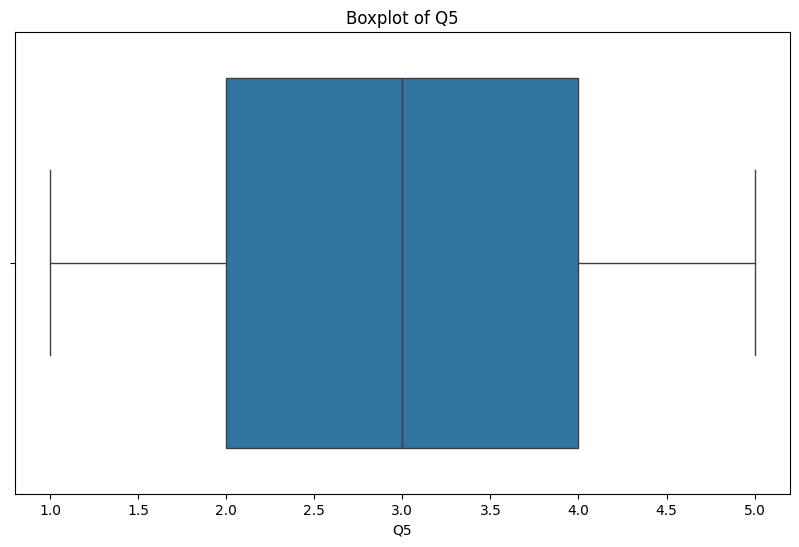

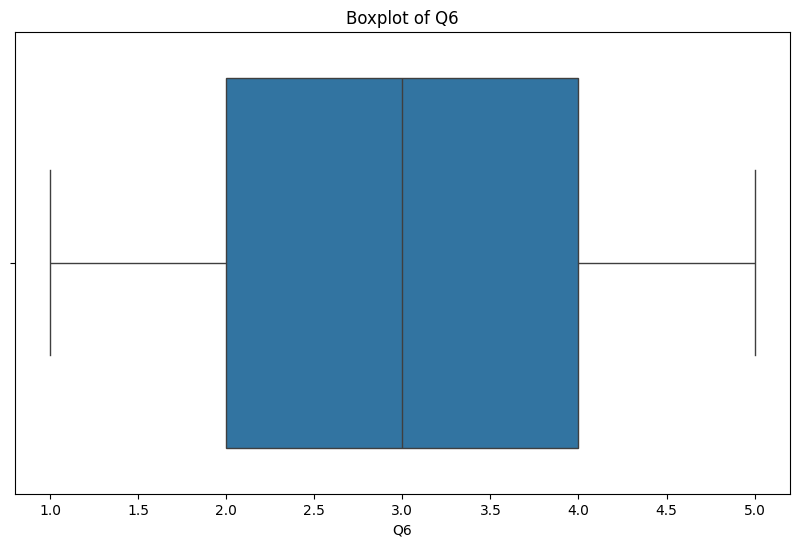

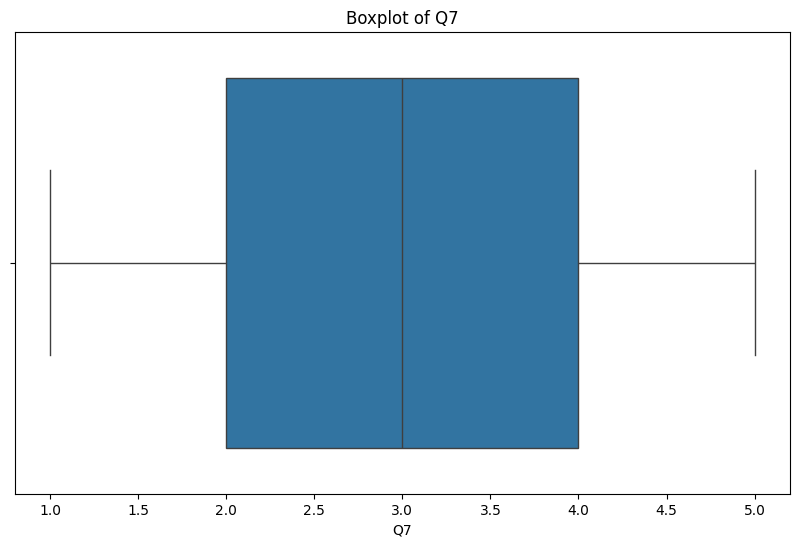

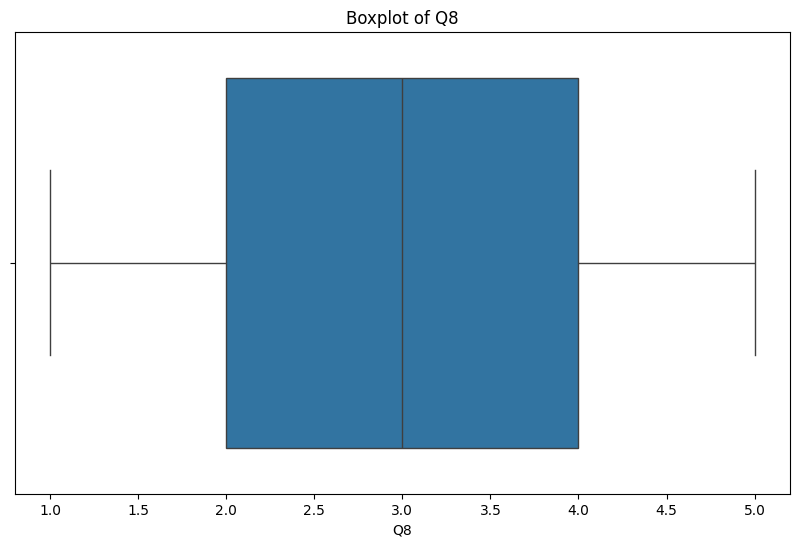

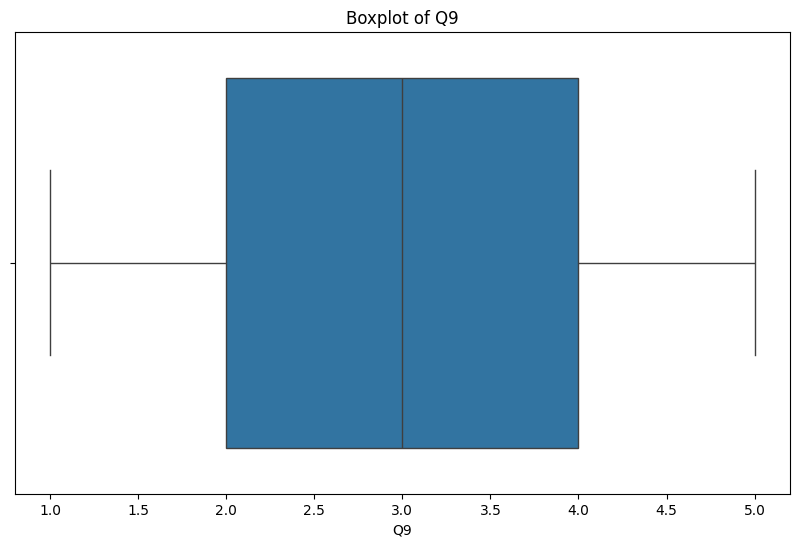

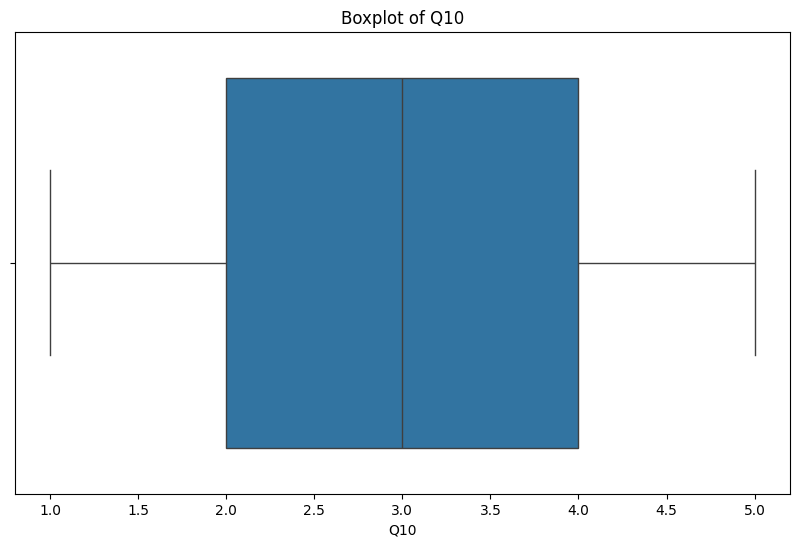

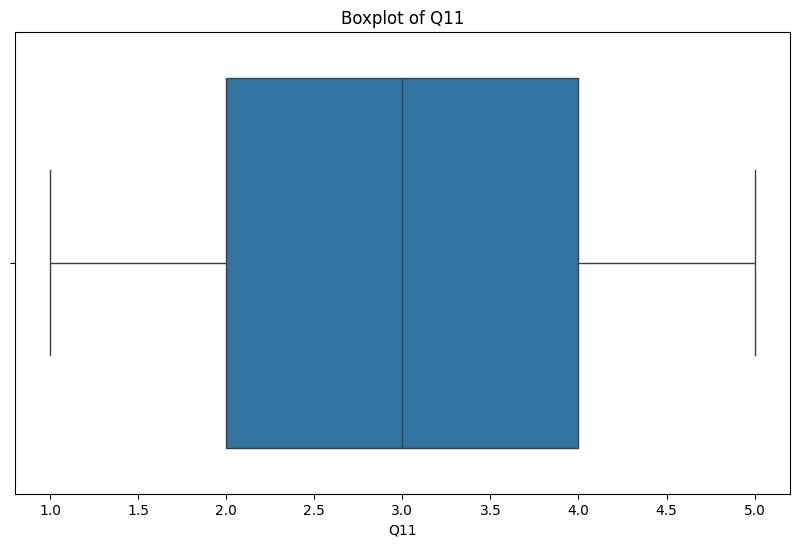

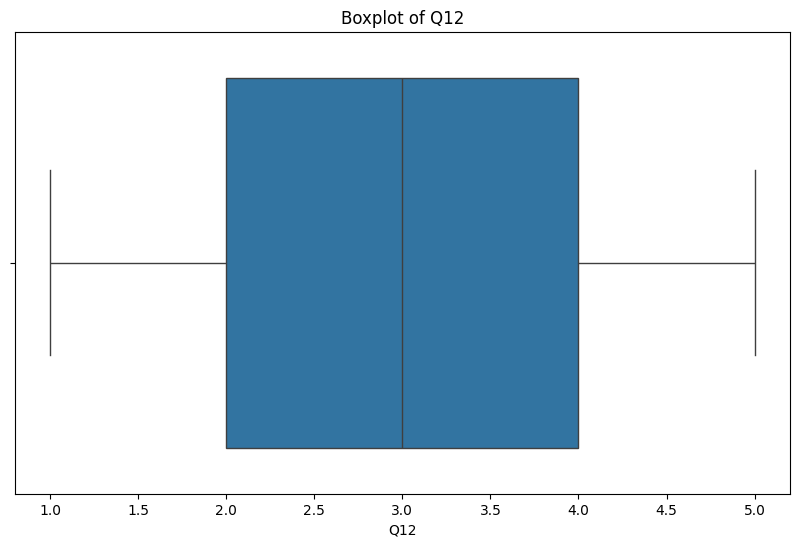

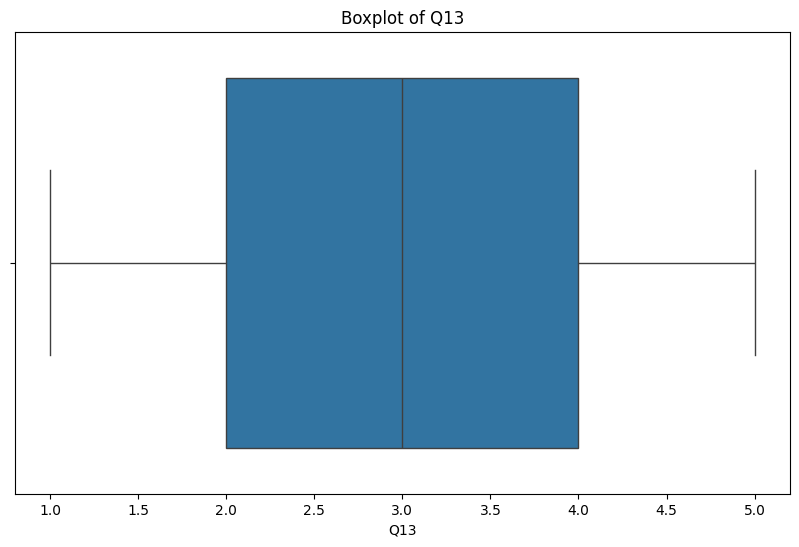

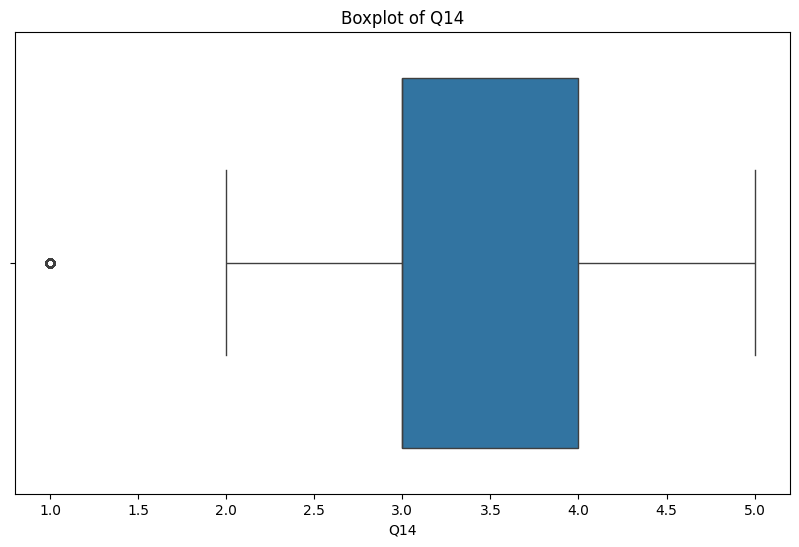

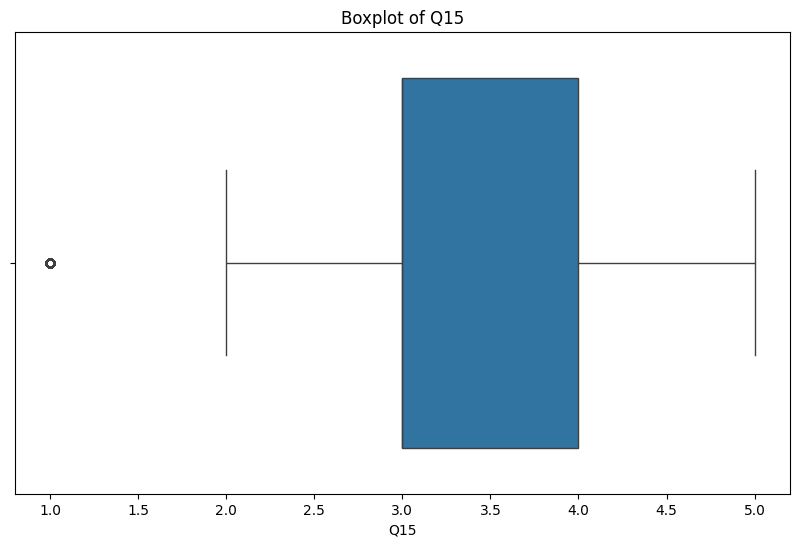

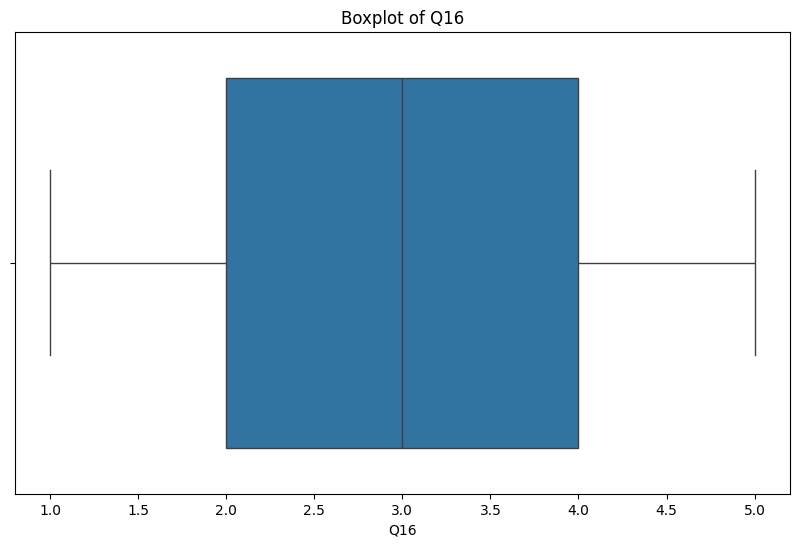

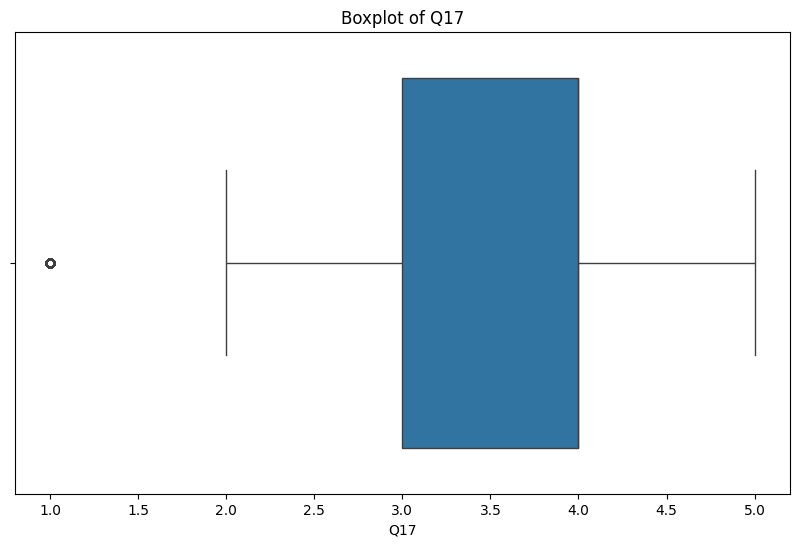

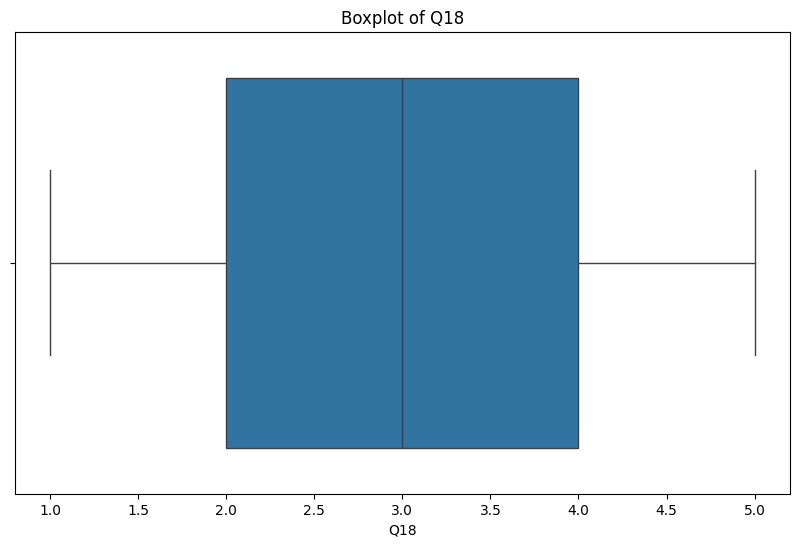

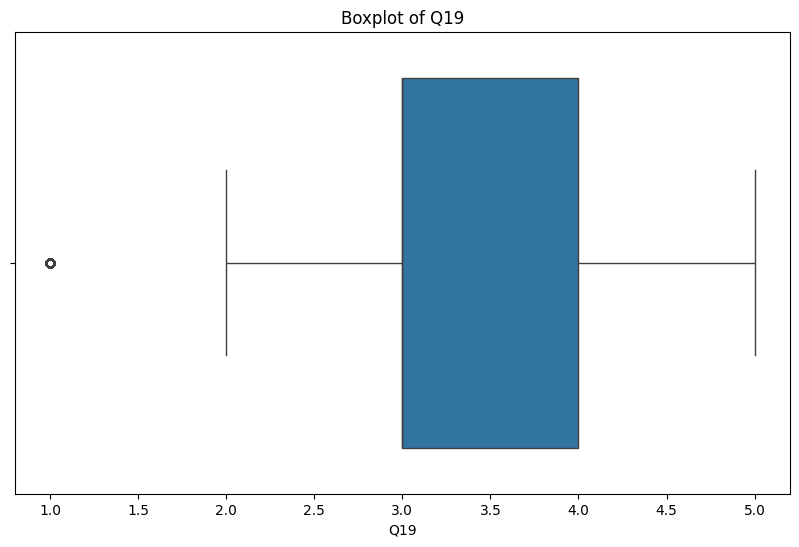

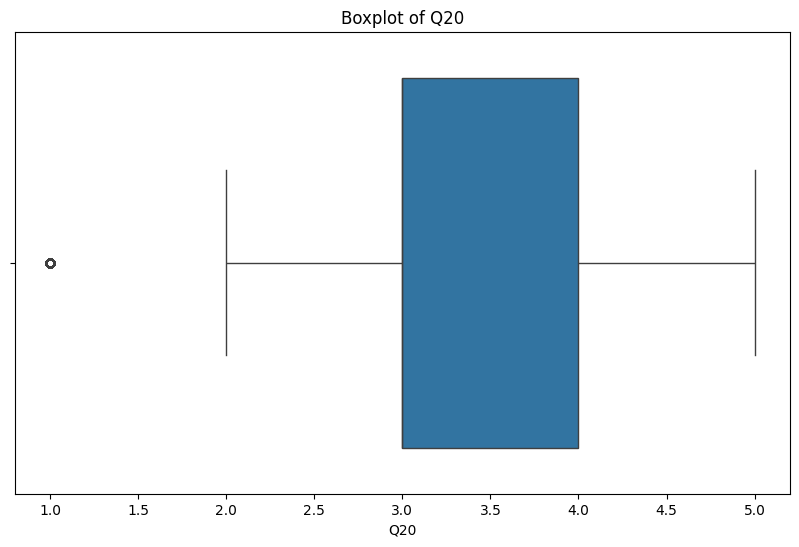

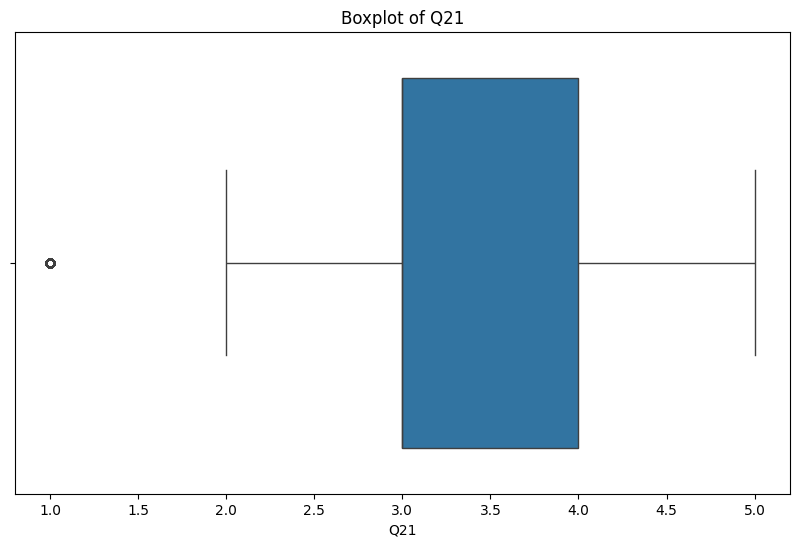

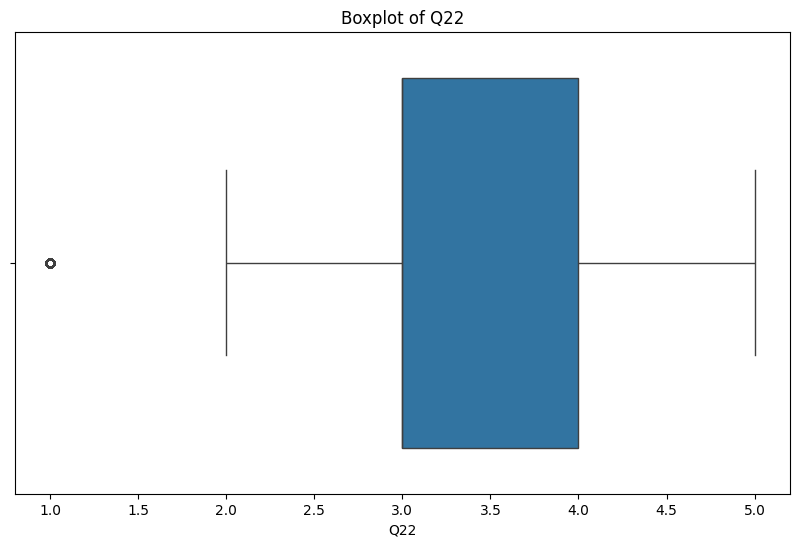

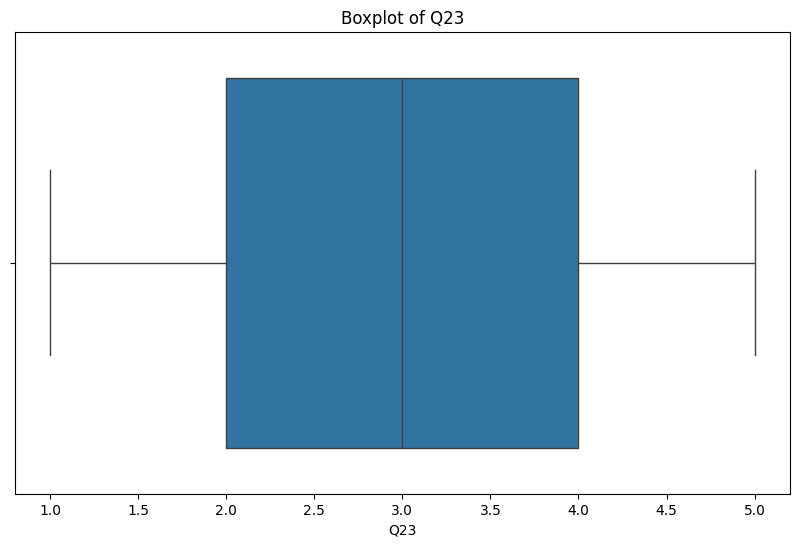

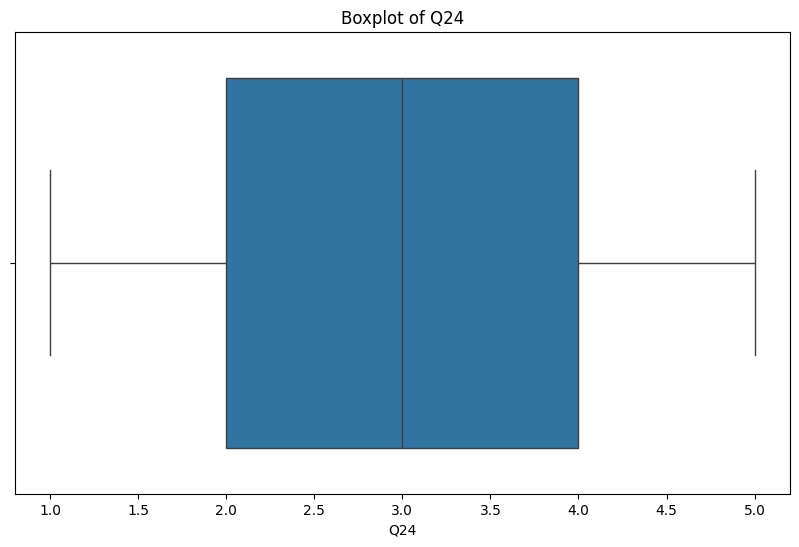

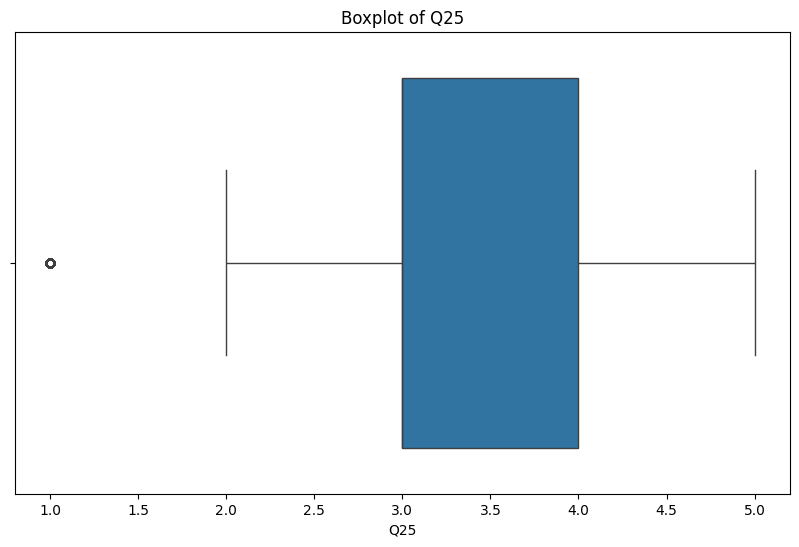

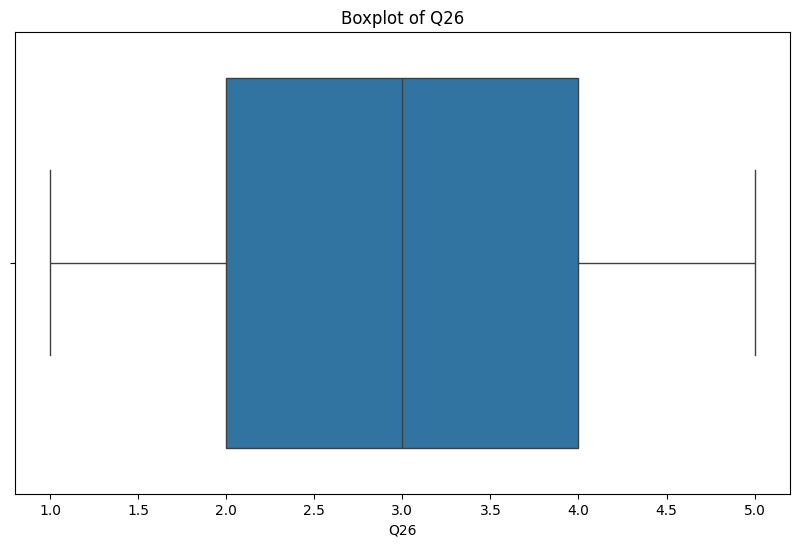

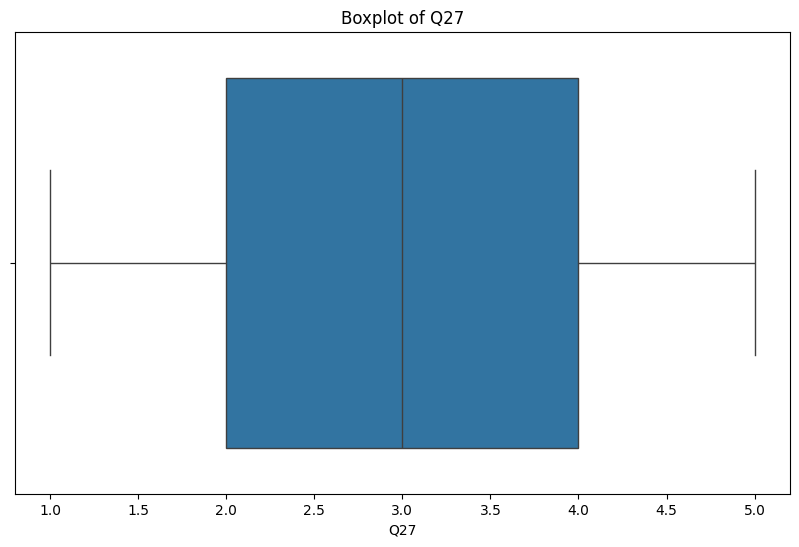

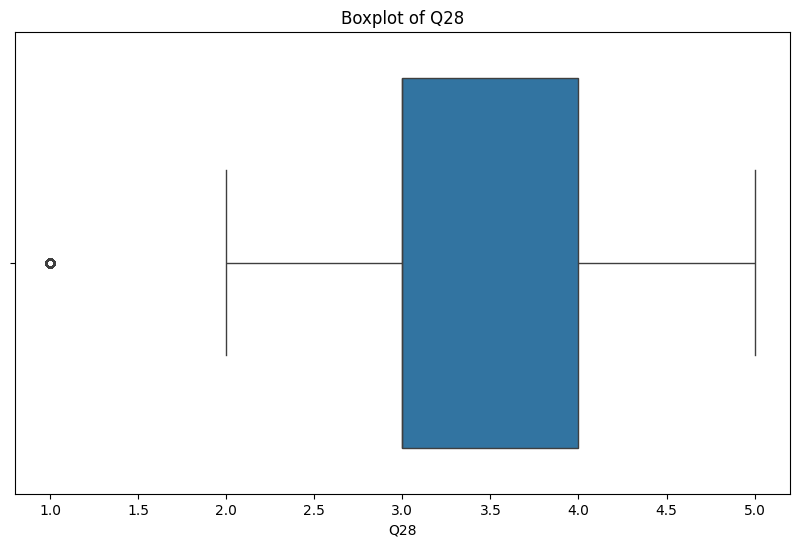

In [55]:
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

In [56]:
X = data
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [57]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

<ipython-input-62-9c6b178890c1>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], palette="coolwarm")  # Adjust palette as desired


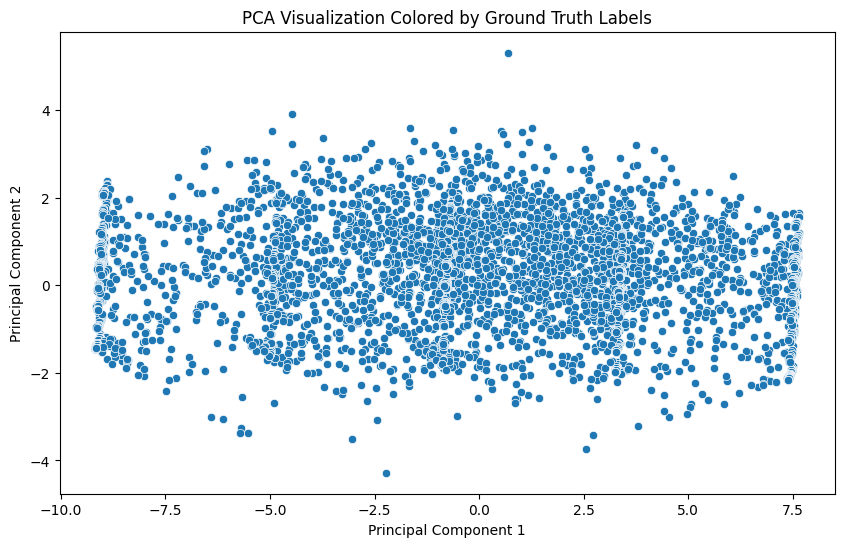

In [62]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], palette="coolwarm")  # Adjust palette as desired
plt.title("PCA Visualization Colored by Ground Truth Labels")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

## Clustering

### DBSCAN

In [63]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_pca)

In [64]:
dbscan = DBSCAN(eps=0.8, min_samples=10)
dbscan_labels2 = dbscan.fit_predict(X_pca)

In [114]:
dbscan = DBSCAN(eps=0.3, min_samples=15)
dbscan_labels3 = dbscan.fit_predict(X_pca)

In [115]:
# Add the cluster labels to the original dataset
data['DBSCAN_cluster'] = dbscan_labels
data['DBSCAN_cluster2'] = dbscan_labels2
data['DBSCAN_cluster3'] = dbscan_labels3

In [67]:
y = data['DBSCAN_cluster']

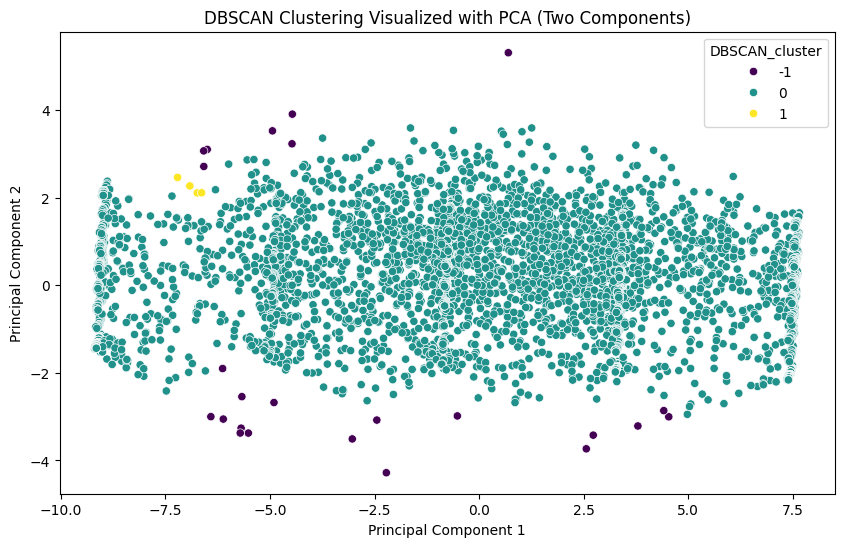

In [68]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="viridis")
plt.title("DBSCAN Clustering Visualized with PCA (Two Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

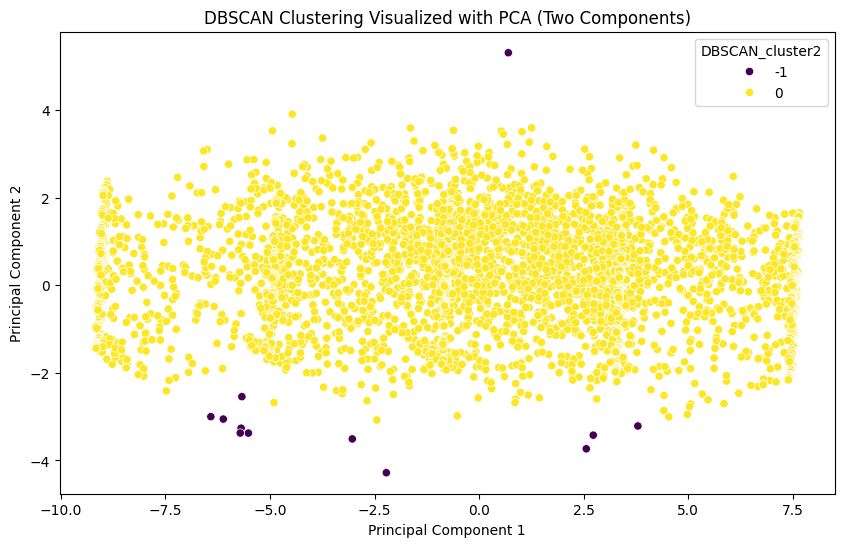

In [69]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['DBSCAN_cluster2'], palette="viridis")
plt.title("DBSCAN Clustering Visualized with PCA (Two Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

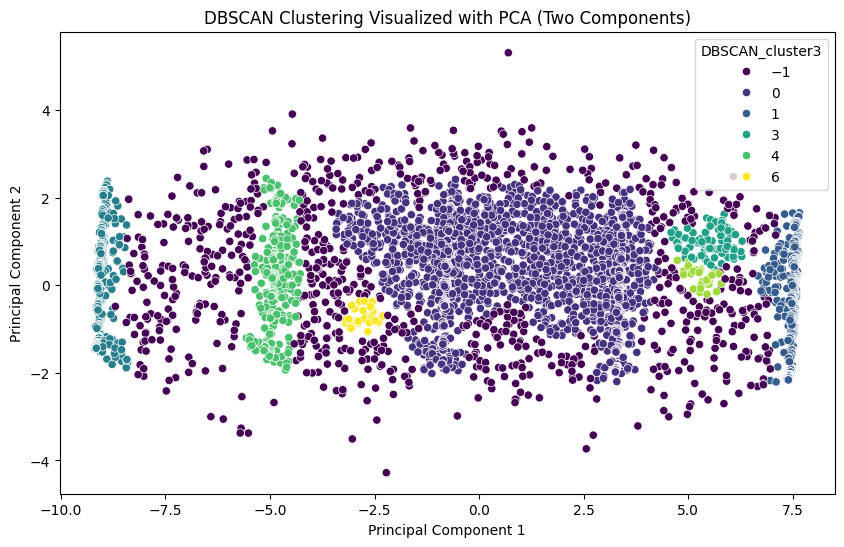

In [116]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['DBSCAN_cluster3'], palette="viridis")
plt.title("DBSCAN Clustering Visualized with PCA (Two Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

By changing eps, you'll observe how clusters either shrink (when eps is smaller) or merge into larger clusters (when eps is larger).

Varying min_samples will show how the minimum number of points in a cluster influences the number of clusters and their density. With larger min_samples, fewer but denser clusters will form, while smaller values might result in smaller and less compact clusters.

### OPTICS

In [104]:
# Initialize OPTICS
optics1 = OPTICS(min_samples=30, xi=0.1, min_cluster_size=0.1)  # Adjust parameters as needed
optics_labels1 = optics1.fit_predict(X_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


In [79]:
# Changing parameters
optics2 = OPTICS(min_samples=5, xi=0.01, min_cluster_size=0.01)  # Adjust parameters as needed
optics_labels2 = optics2.fit_predict(X_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


In [143]:
# Changing parameters
optics3 = OPTICS(min_samples=20, xi=0.02, min_cluster_size=0.1)  # Adjust parameters as needed
optics_labels3 = optics3.fit_predict(X_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


In [144]:
# Add the cluster labels to the original dataset
data['OPTICS_cluster1'] = optics_labels1
data['OPTICS_cluster2'] = optics_labels2
data['OPTICS_cluster3'] = optics_labels3

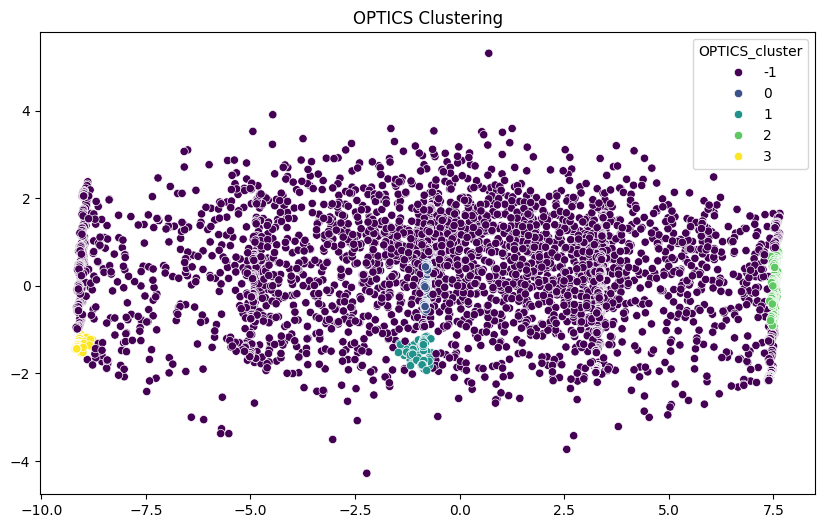

In [106]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x=X_pca[:, 0], y=X_pca[:, 1], hue='OPTICS_cluster', palette="viridis")
plt.title("OPTICS Clustering")
plt.show()

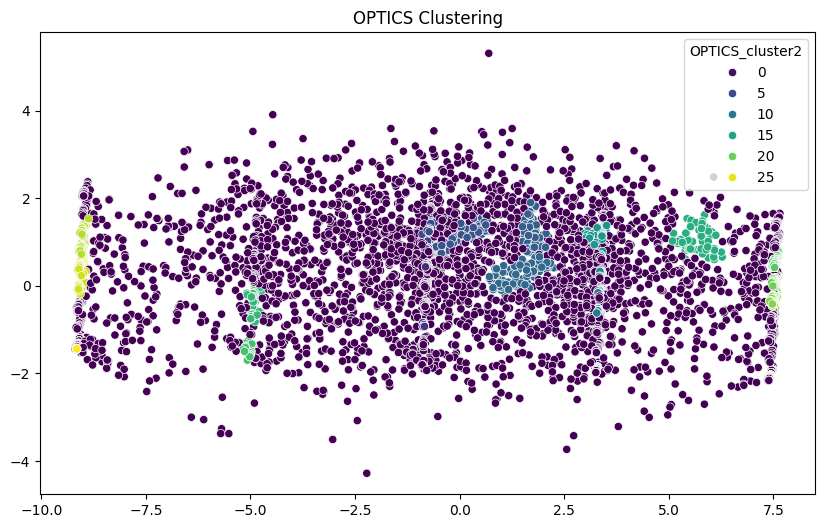

In [83]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x=X_pca[:, 0], y=X_pca[:, 1], hue='OPTICS_cluster2', palette="viridis")
plt.title("OPTICS Clustering")
plt.show()

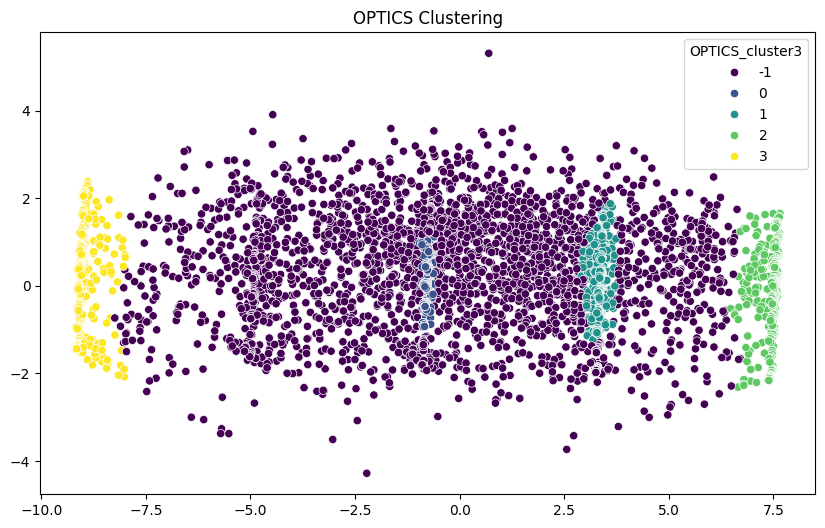

In [145]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x=X_pca[:, 0], y=X_pca[:, 1], hue='OPTICS_cluster3', palette="viridis")
plt.title("OPTICS Clustering")
plt.show()

Changing min_samples will affect how strict the algorithm is about cluster density. Lower min_samples will result in more clusters, while higher values will make it more stringent.

Varying max_eps controls the maximum distance that points can have to be connected to a cluster. Larger values will result in more expansive clusters, while smaller ones will create more localized, tighter clusters.

### Comparison

DBSCAN can be limited by the choice of eps and min_samples, especially when clusters vary widely in density. If eps is chosen poorly, many points may be marked as noise, or too many points may be included in a single cluster.

OPTICS is more flexible and can adapt to varying densities. By adjusting max_eps, you can control the scale of clustering more effectively, and min_samples allows you to set a threshold for what qualifies as a dense region. OPTICS can also generate a reachability plot, which provides more detailed information about the clustering structure.

DBSCAN can identify clusters in outliers, while OPTICS can identify clusters based on sensitivity .

### Reachability Distance

<ipython-input-142-e79b4a6d2e18>:17: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  ax[i].plot(np.where(clusters == cluster_label)[0],
<ipython-input-142-e79b4a6d2e18>:17: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  ax[i].plot(np.where(clusters == cluster_label)[0],
<ipython-input-142-e79b4a6d2e18>:17: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "y." (-> marker='.'). The keyword argument will take precedence.
  ax[i].plot(np.where(clusters == cluster_label)[0],
<ipython-input-142-e79b4a6d2e18>:17: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "c." (-> marker='.'). The keyword argument will take precedence.
  ax[i].plot(np.where(clusters == cluster_label)[0],


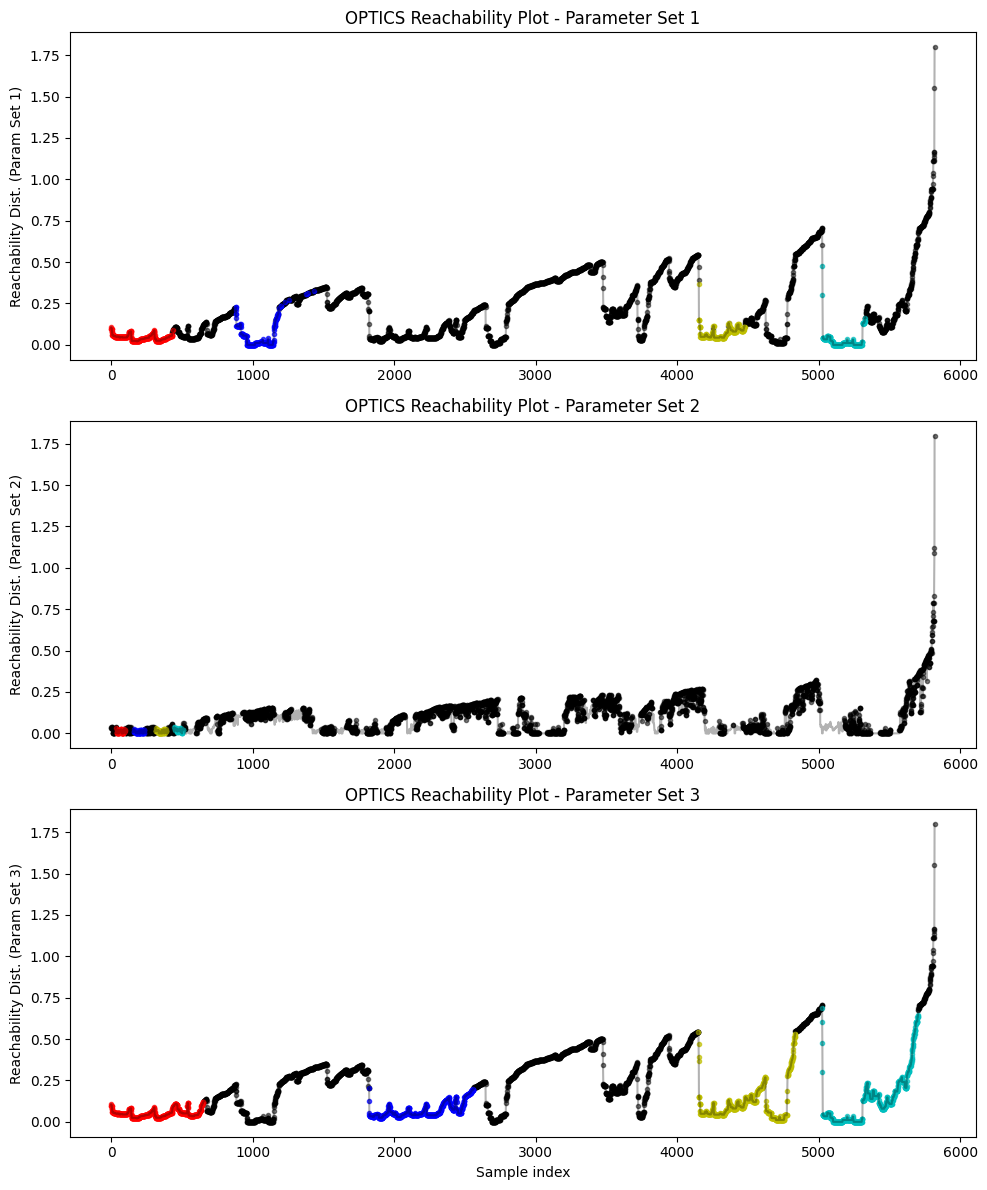

In [142]:
# Plot reachability distance for each clustering configuration
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 3 rows for the 3 parameter settings

# Define the models and labels for each plot
optics_models = [optics1, optics2, optics3]
labels = [data['OPTICS_cluster'], data['OPTICS_cluster2'], data['OPTICS_cluster3']]  # OPTICS labels

for i, (optics_model, cluster_labels) in enumerate(zip(optics_models, labels)):
    # Extract reachability distances and ordering of points
    reachability = optics_model.reachability_[optics_model.ordering_]
    clusters = cluster_labels[optics_model.ordering_]

    # Plot reachability distances
    colors = ['g.', 'r.', 'b.', 'y.', 'c.']  # Define colors for up to 5 clusters
    for cluster_label, color in zip(np.unique(clusters), colors):
        if cluster_label != -1:  # Exclude noise points
            ax[i].plot(np.where(clusters == cluster_label)[0],
                       reachability[clusters == cluster_label],
                       color, alpha=0.7, marker='.')
        else:  # Plot noise points
            ax[i].plot(np.where(clusters == -1)[0],
                       reachability[clusters == -1],
                       'k.', alpha=0.5)

    ax[i].plot(reachability, 'k-', alpha=0.3)  # Plot the reachability line for all points
    ax[i].set_ylabel(f'Reachability Dist. (Param Set {i + 1})')
    ax[i].set_title(f'OPTICS Reachability Plot - Parameter Set {i + 1}')

ax[-1].set_xlabel("Sample index")
plt.tight_layout()
plt.show()


### Radar Charts

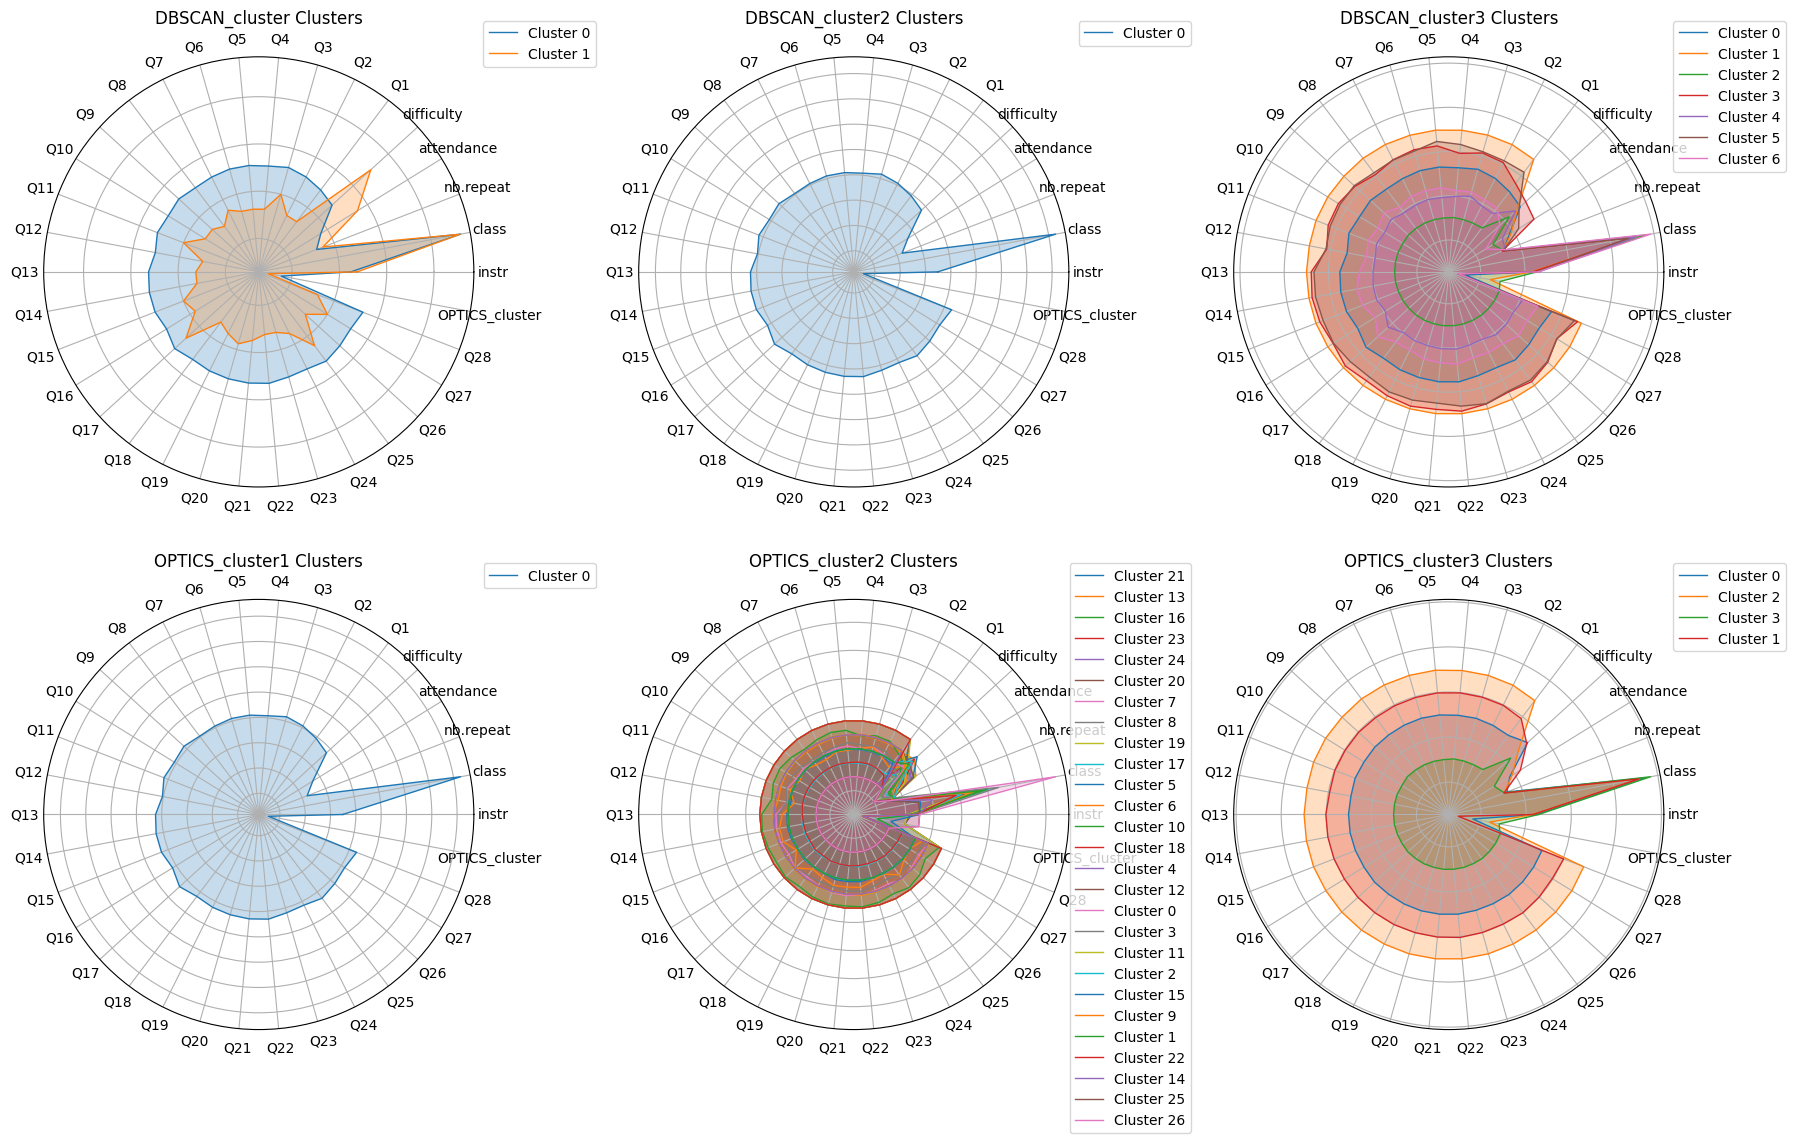

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Assuming `data` has columns for each DBSCAN and OPTICS cluster and the features

# List of cluster columns and their corresponding names for labeling
cluster_columns = [
    'DBSCAN_cluster', 'DBSCAN_cluster2', 'DBSCAN_cluster3',
    'OPTICS_cluster1', 'OPTICS_cluster2', 'OPTICS_cluster3'
]

# Features to include in the radar chart (assuming they're all numerical columns except clustering columns)
features = [col for col in data.columns if col not in cluster_columns]

# Number of variables/features
num_vars = len(features)

# Radar chart setup function
def create_radar_chart(ax, cluster_data, cluster_name):
    # Compute angle of each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop

    # Plot each cluster on the radar chart
    unique_clusters = cluster_data[cluster_name].unique()
    for cluster_label in unique_clusters:
        if cluster_label == -1:  # Skip noise if applicable
            continue
        # Calculate the mean for each feature in this cluster
        cluster_means = cluster_data[cluster_data[cluster_name] == cluster_label][features].mean().tolist()
        cluster_means += cluster_means[:1]  # Complete the loop for radar chart

        # Plot each cluster line on the radar chart
        ax.plot(angles, cluster_means, linewidth=1, linestyle='solid', label=f'Cluster {cluster_label}')
        ax.fill(angles, cluster_means, alpha=0.25)

    # Customize chart appearance
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features, fontsize=10)
    ax.set_yticklabels([])
    ax.set_title(f'{cluster_name} Clusters')
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Plot each cluster set on a separate radar chart
fig, axs = plt.subplots(2, 3, subplot_kw=dict(polar=True), figsize=(18, 12))
axs = axs.flatten()  # Flatten the axes array for easy indexing

for i, cluster_name in enumerate(cluster_columns):
    create_radar_chart(axs[i], data, cluster_name)

plt.tight_layout()
plt.show()


### DBSCAN with Epsilon Circles Animation (doesnt work)

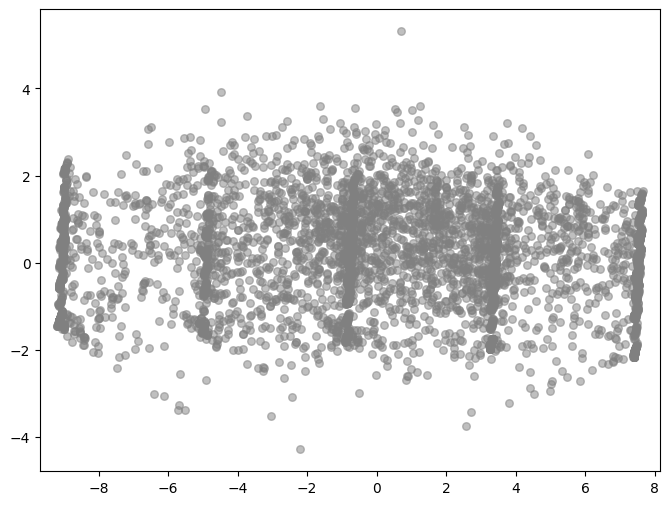

In [90]:
X = X_pca

# DBSCAN configurations
eps_values = [0.5, 0.8, 0.1]  # epsilon values for each DBSCAN configuration
min_samples_values = [5, 10, 5]  # min_samples values for each configuration
dbscan_labels_list = [
    data['DBSCAN_cluster'].values,
    data['DBSCAN_cluster2'].values,
    data['DBSCAN_cluster3'].values
]

# Plot setup
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5)
ax.set_ylim(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5)

# Initial scatter plot setup, colors will be updated in the animation function
scatter = ax.scatter(X[:, 0], X[:, 1], c='gray', s=30, alpha=0.5)
circles = []  # To store epsilon circles

# Animation function
def update_dbscan(frame):
    # Clear previous circles
    global circles
    for circle in circles:
        circle.remove()  # Remove old circles to avoid overlap
    circles = []  # Reset circles list for the current frame

    # Retrieve DBSCAN parameters and labels for the current frame
    eps = eps_values[frame]
    min_samples = min_samples_values[frame]
    dbscan_labels = dbscan_labels_list[frame]

    # Assign colors to clusters and noise points
    unique_labels = np.unique(dbscan_labels)
    color_map = plt.cm.get_cmap("viridis", len(unique_labels))

    # Update colors for scatter plot points based on DBSCAN labels
    colors = [color_map(label) if label != -1 else 'black' for label in dbscan_labels]
    scatter.set_color(colors)  # Update scatter plot colors

    # Draw epsilon circles around each point in the cluster (if not noise)
    for label in unique_labels:
        if label == -1:
            continue  # Skip noise points (label -1)

        cluster_points = X[dbscan_labels == label]
        cluster_color = color_map(label)

        for point in cluster_points:
            circle = plt.Circle((point[0], point[1]), eps, color=cluster_color, fill=False, linestyle='--', alpha=0.3)
            ax.add_patch(circle)
            circles.append(circle)  # Keep track of circles to clear them in the next frame

    # Update title to reflect current DBSCAN parameters
    ax.set_title(f"DBSCAN Clustering (eps={eps}, min_samples={min_samples})")

# Initialize the animation with a longer interval between frames
ani_dbscan = FuncAnimation(fig, update_dbscan, frames=len(dbscan_labels_list), interval=2000, blit=False)
plt.show()
